In [1]:
# Imports
%matplotlib qt
import matplotlib.pyplot as plt
import mne
import os
import numpy as np
from scipy.stats import pearsonr
from foof.fit import FOOF

In [2]:
# Set up paths

# This base path will need updating
base_path = '/Users/luyandamdanda/Documents/Research/EEG_Dat'

# These should stay the same
#subj_dat_fname = '._3502_resampled.set'
subj_dat_fname = '3503_resampled.set'

In [3]:
# Read in subject listed above

ev_dict = {'Start Block': 1001., 'End Block': 1002., 'Start Labelling Block':1003., 'End Labelling Block':1004}
# event dictionary to ensure "Start Block" and "End Block"

full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)

Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
2290/3022 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading /Users/luyandamdanda/Documents/Research/EEG_Dat/3503_resampled.fdt


<ipython-input-3-693e87f92b96>:7: RuntimeWarning: Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)
<ipython-input-3-693e87f92b96>:7: RuntimeWarning: 2290/3022 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)


In [4]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

In [5]:
eeg_dat.set_eeg_reference()
# set EEG average reference

Adding average EEG reference projection.
1 projection items deactivated


<RawEEGLAB  |  3503_resampled.fdt, n_channels x n_times : 65 x 1824011 (3648.0 sec), ~140 kB, data not loaded>

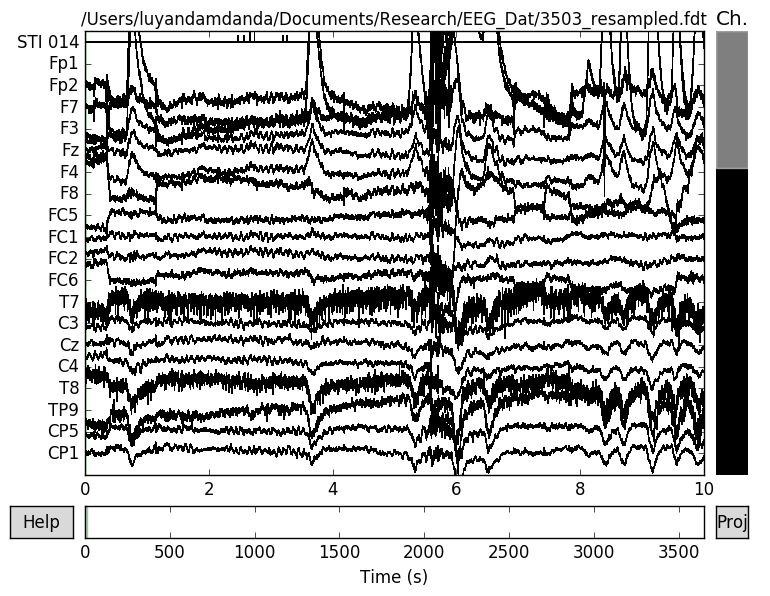

In [6]:
eeg_dat.plot()

In [7]:
# identifying all the events and IDs
mne.find_events(eeg_dat)

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]


array([[   1234,       0,       3],
       [   1282,       0,       3],
       [   1334,       0,       5],
       ..., 
       [1809424,       0,      10],
       [1814345,       0,      10],
       [1816041,       0,    1002]])

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 9 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1001 missing from event_id will be ignored
event 1002 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 9 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 1001 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 1002 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-258898793aa5>:12: RuntimeWarning: event 1004 missing from event_id will be ignored
  event_id=event_id)


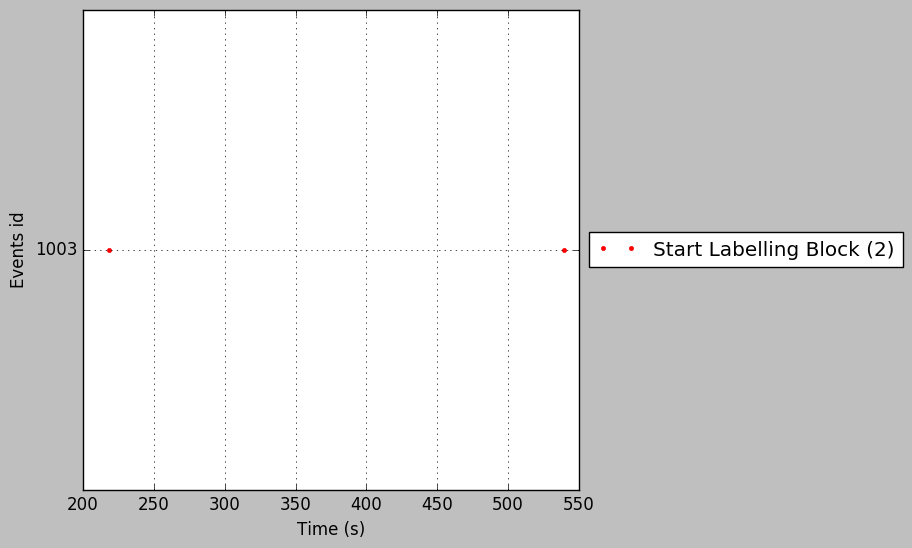

In [8]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003}
color = {1003:'red'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [9]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")

name is deprecated and will be removed in 0.15.
2 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-9-ec8bb6350a58>:1: RuntimeWarning: name is deprecated and will be removed in 0.15.
  epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")


Loading data for 2 events and 351 original time points ...
0 bad epochs dropped
Loading data for 2 events and 351 original time points ...


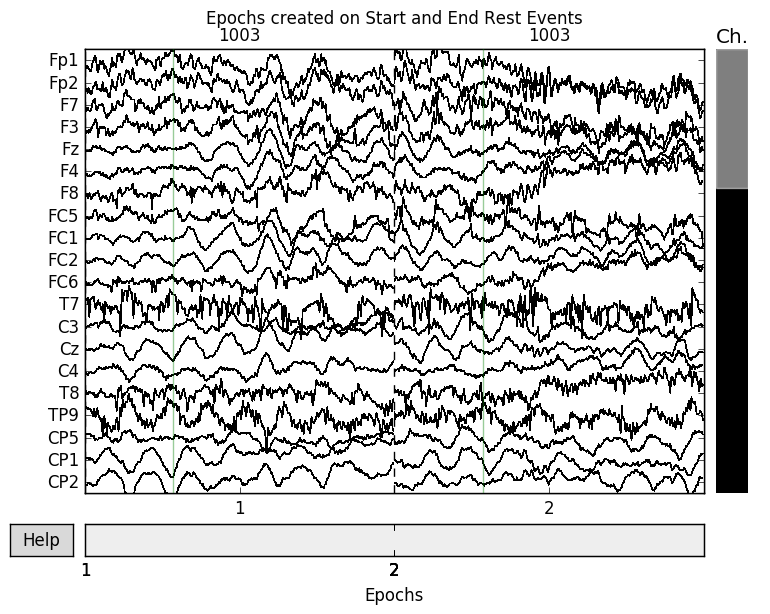

In [10]:
epochs.plot()

# Marking bad channels
### Based on visualization.


In [11]:
eeg_dat.info['bads'] = ['TP9']

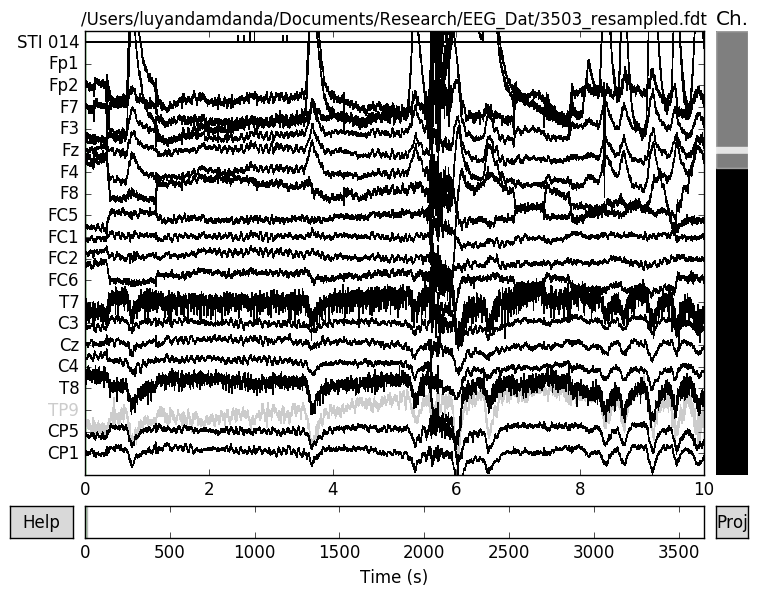

In [12]:
# plot with bads
eeg_dat.plot()

In [13]:
print('Bad channels: ', eeg_dat.info['bads'])

('Bad channels: ', ['TP9'])


In [14]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | TP9
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | Average EEG reference: off
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplot

# Marking bad moments
### Identifying bad moments based on visualization

In [15]:
# Not to critical for this data

# Re-referencing to average

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 9 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1001 missing from event_id will be ignored
event 1002 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 9 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1001 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1002 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1004 missing from event_id will be ignored
  event_id=event_id)


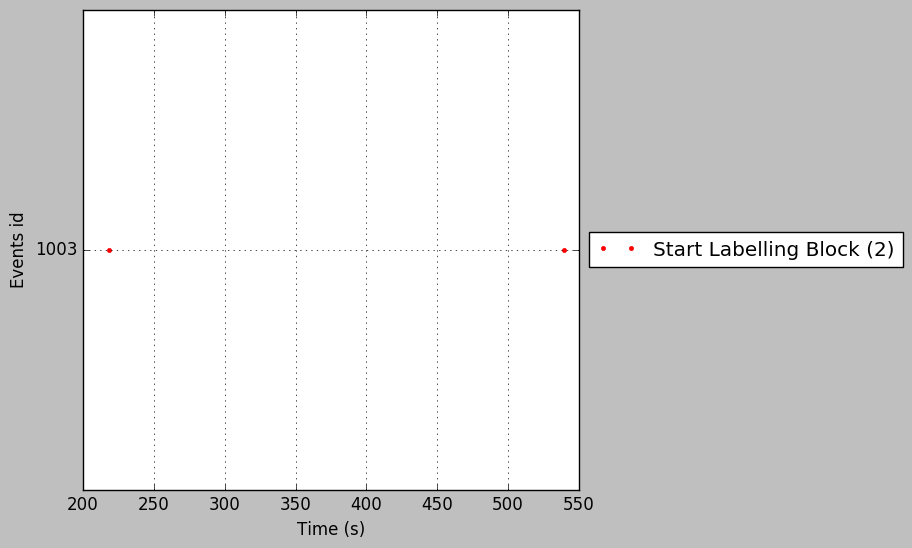

In [16]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003}
color = {1003:'red'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [17]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 125,
                    baseline = None, name = "Epochs created on Start and End Rest Events")

name is deprecated and will be removed in 0.15.
2 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-17-40f0dbcdb9cf>:2: RuntimeWarning: name is deprecated and will be removed in 0.15.
  baseline = None, name = "Epochs created on Start and End Rest Events")


In [18]:
chs = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(chs)

<Epochs  |  n_events : 2 (good & bad), tmin : 5.0 (s), tmax : 125.0 (s), baseline : None, ~143 kB, data not loaded>

In [19]:
epochs.drop_bad()

Loading data for 2 events and 60001 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 2 (all good), tmin : 5.0 (s), tmax : 125.0 (s), baseline : None, ~143 kB, data not loaded>

Loading data for 2 events and 60001 original time points ...


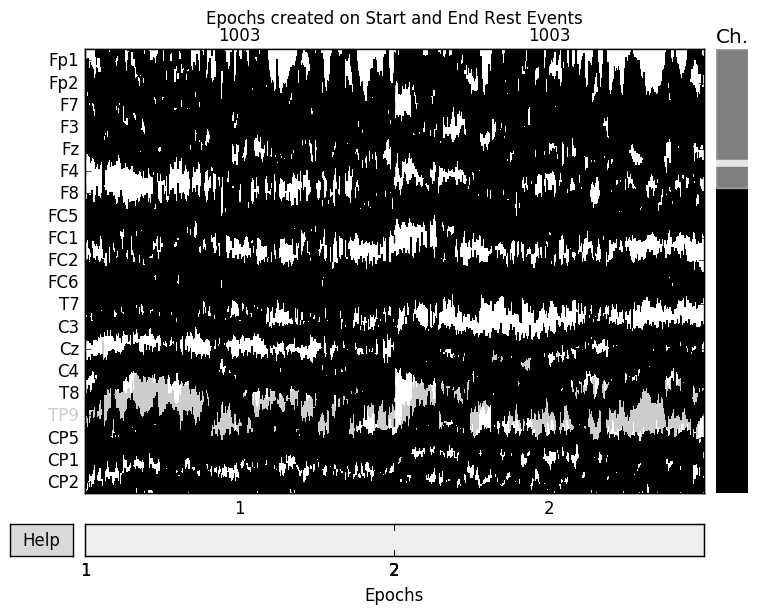

In [20]:
epochs.plot()

Loading data for 2 events and 60001 original time points ...


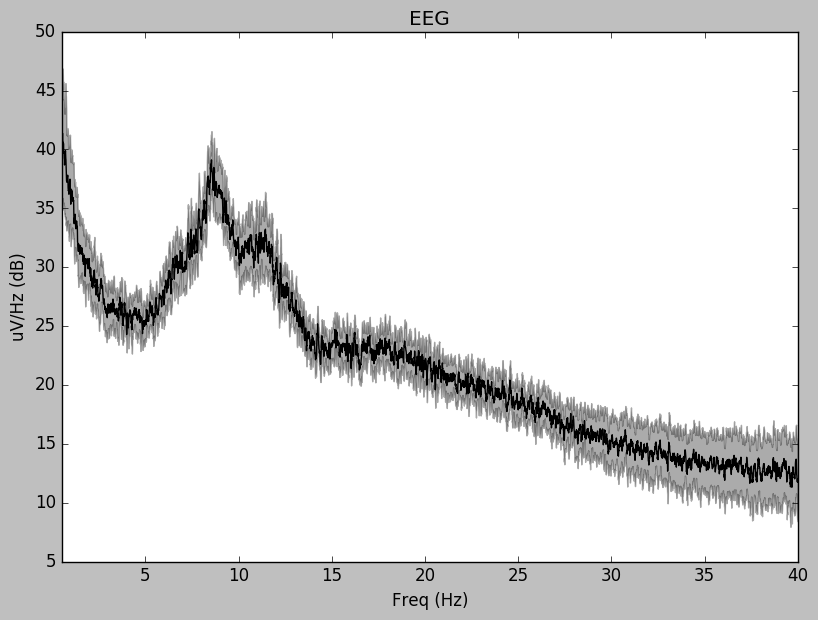

In [21]:
epochs.plot_psd(fmin = 0.5, fmax = 40)

Loading data for 2 events and 60001 original time points ...


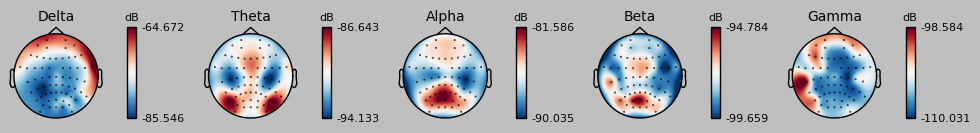

In [22]:
epochs.plot_psd_topomap()

In [23]:
# Calculate PSDs
psds, freqs = mne.time_frequency.psd_welch(epochs, fmin=3., fmax=40., n_fft=500)

# Average PSDs for each channel across each rest block
avg_psds = np.mean(psds, axis=0)

Loading data for 2 events and 60001 original time points ...
Effective window size : 1.000 (s)


In [24]:
avg_psds.shape

(63, 38)

In [25]:
psds.shape

(2, 63, 38)

In [26]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

In [27]:
plt.plot(freqs, np.log10(psds[1, 30, :]))

# FOOFing Data

In [28]:
# Settings for FOOF
min_p = 0.2
freq_res = np.mean(np.diff(freqs))
foof = FOOF(freqs, res=freq_res, min_p=min_p)
#psd = np.reshape(avg_psds[50, :], [len(freqs), 1])
psd = np.reshape(psds[0, 10, :], [len(freqs), 1])
foof.fit(psd)

In [29]:
# Extract foof fit data
foof_dat = (foof.chi_, foof.centers_, foof.powers_, foof.stdevs_)
sl_foof = -foof.chi_

In [30]:
# Check FOOF outputs:
# foof_dat is [slope_val, [center frequencies], [oscillation powers], [oscillation bandwidths]]
foof_dat

(1.748357980121237,
 array([  8.63334171,  11.31418655,  17.52073403]),
 array([  5.40797589e-12,   1.93916505e-12,   2.81529643e-13]),
 array([ 0.99347824,  1.27342841,  2.41293152]))

In [31]:
type(foof_dat)

tuple

In [32]:
foofresults = []
for i in range (psds.shape[1]):
    psd = np.reshape(psds[0, i, :], [len(freqs), 1])
    foof.fit(psd)
    # Extract foof fit data
    foof_dat = (foof.chi_, foof.centers_, foof.powers_, foof.stdevs_)
    foofresults.append(foof_dat)

In [33]:
print(foofresults)

[(1.0661749225623918, array([  8.5611538,  11.3945899]), array([  1.00355569e-11,   3.64220572e-12]), array([ 1.14539136,  1.05119519])), (0.91570486977113097, array([  8.57979376,  11.46161783]), array([  1.03512926e-11,   3.49569109e-12]), array([ 1.25951018,  1.02858699])), (1.2112845212260828, array([  8.38842005,  11.10085364]), array([  6.89033130e-12,   3.22420304e-12]), array([ 0.97643357,  1.29347674])), (3.0808938462617359, array([ 9.89622457]), array([  3.97817263e-12]), array([ 1.40240342])), (3.8700185156737525, array([ 10.34600323,  21.2839874 ]), array([  4.47793344e-12,   3.08185970e-13]), array([ 1.35753768,  2.40035809])), (3.575212635757604, array([ 10.05597648,  24.56985291]), array([  4.00584890e-12,   1.53289396e-13]), array([ 1.38444762,  1.58622578])), (1.3206799909502385, array([  8.62597893,  11.20832525]), array([  6.97944958e-12,   2.48678167e-12]), array([ 1.04100369,  1.01346804])), (2.9224381801678634, array([ 9.99789188]), array([  2.76511542e-12]), arra

Slope should be less than 2

In [34]:
print(foofresults[1])

(0.91570486977113097, array([  8.57979376,  11.46161783]), array([  1.03512926e-11,   3.49569109e-12]), array([ 1.25951018,  1.02858699]))


In [35]:
f_res = foofresults[0]

In [36]:
alpha = np.zeros(len(foofresults))
theta = np.zeros(len(foofresults))
beta = np.zeros(len(foofresults))

# Looping through channels
#for i in range len(foofresults):
for cur_chan, f_res in enumerate(foofresults):
    #print(cur_chan)
    
    # Check how many oscillations found on current chan
    n_oscs = len(f_res[1])
    
    # Temporary power vaariables (t - temp)
    talphapower = 0;
    tthetapower = 0;
    tbetapower = 0;
    
    # Places frequencies in categories
    #for osc in range(n_oscs):
    for ind, cen in enumerate(f_res[1]):
        
        # within theta range    
        if 3 <= cen < 7:
            if not theta[cur_chan]:
                theta[cur_chan] = cen
            else:
                if f_res[2][ind] > talphapower:
                    alpha[cur_chan] = cen
                    talphapower = f_res[2][ind]
        
        # within alpha range    
        if 7 <= cen < 14:
            if not alpha[cur_chan]:
                alpha[cur_chan] = cen
                talphapower = f_res [2][ind]
            else:
                if f_res[2][ind] > talphapower:
                    alpha[cur_chan] = cen
                    talphapower = f_res[2][ind]
                     
        # within beta range    
        if 14 <= cen <= 30:
            if not beta[cur_chan]:
                beta[cur_chan] = cen
                tbetapower = f_res[2][ind]
            else:
                if f_res[2][ind] > tbetapower:
                    beta[cur_chan] = cen
                    tbetapower = f_res[2][ind]
            
        #if  theta[foofresults.index(f_res)] == 0 and f_res[2][osc]>tthetapower:
        #    theta[foofresults.index(f_res)] = f_res[1][osc]
        #    tthetapower = f_res[2][osc]
        # within alpha range
        #if 7 <= f_res[1][osc] < 14:
        #    if  alpha[foofresults.index(f_res)] == 0 and f_res[2][osc]>talphapower:
        #        alpha[foofresults.index(f_res)] = f_res[1][osc]
        #        talphapower = f_res[2][osc]        
        # within beta range
        #if 14 <= f_res[1][osc] <= 30:
        #    if  beta[foofresults.index(f_res)] == 0 and f_res[2][osc]>tbetapower:
        #        beta[foofresults.index(f_res)] = f_res[1][osc]
        #        tbetapower = f_res[2][osc]

In [37]:
epochs.ch_names

[u'Fp1',
 u'Fp2',
 u'F7',
 u'F3',
 u'Fz',
 u'F4',
 u'F8',
 u'FC5',
 u'FC1',
 u'FC2',
 u'FC6',
 u'T7',
 u'C3',
 u'Cz',
 u'C4',
 u'T8',
 u'TP9',
 u'CP5',
 u'CP1',
 u'CP2',
 u'CP6',
 u'TP10',
 u'P7',
 u'P3',
 u'Pz',
 u'P4',
 u'P8',
 u'PO9',
 u'O1',
 u'Oz',
 u'O2',
 u'PO10',
 u'AF7',
 u'AF3',
 u'AF4',
 u'AF8',
 u'F5',
 u'F1',
 u'F2',
 u'F6',
 u'FT9',
 u'FT7',
 u'FC3',
 u'FC4',
 u'FT8',
 u'FT10',
 u'C5',
 u'C1',
 u'C2',
 u'C6',
 u'TP7',
 u'CP3',
 u'CPz',
 u'CP4',
 u'TP8',
 u'P5',
 u'P1',
 u'P2',
 u'P6',
 u'PO7',
 u'PO3',
 u'POz',
 u'PO4',
 u'PO8',
 'STI 014']

In [38]:
chs.pos

array([[ -2.94367000e-02,   8.39171000e-02,  -6.99000000e-03],
       [  2.98723000e-02,   8.48959000e-02,  -7.08000000e-03],
       [ -5.48397000e-02,   6.85722000e-02,  -1.05900000e-02],
       [ -3.37007000e-02,   7.68371000e-02,   2.12270000e-02],
       [  3.57123000e-02,   7.77259000e-02,   2.19560000e-02],
       [  5.57433000e-02,   6.96568000e-02,  -1.07550000e-02],
       [ -7.02629000e-02,   4.24743000e-02,  -1.14200000e-02],
       [ -6.44658000e-02,   4.80353000e-02,   1.69210000e-02],
       [ -5.02438000e-02,   5.31112000e-02,   4.21920000e-02],
       [ -2.74958000e-02,   5.69311000e-02,   6.03420000e-02],
       [  3.12200000e-04,   5.85120000e-02,   6.64620000e-02],
       [  2.95142000e-02,   5.76019000e-02,   5.95400000e-02],
       [  5.18362000e-02,   5.43048000e-02,   4.08140000e-02],
       [  6.79142000e-02,   4.98297000e-02,   1.63670000e-02],
       [  7.30431000e-02,   4.44217000e-02,  -1.20000000e-02],
       [ -8.40759000e-02,   1.45673000e-02,  -5.0429000

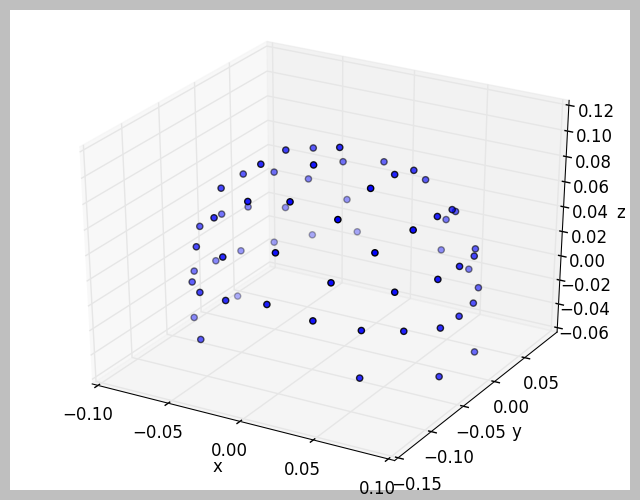

Dropped 0 epochs
Channels marked as bad: ['TP9']
Dropped 0 epochs
Channels marked as bad: []


In [39]:
chs.plot()

In [40]:
len(alpha)

63

In [41]:
np.shape(chs.pos)

(64, 3)

In [42]:
ch_pos = epochs._get_channel_positions()

In [43]:
inds = np.where(alpha > 0)

In [44]:
np.shape(ch_pos[inds, 1])

(1, 59)

In [45]:
plt.plot(np.squeeze(ch_pos[inds, 1]), alpha[inds], '.')

In [46]:
pearsonr(np.squeeze(ch_pos[inds, 1]), alpha[inds])

(-0.4181596095576387, 0.00098199287980157805)

## Checking ranges

In [ ]:
event_id = {'Start Labelling Block':1003, 'End Labelling Block':1004}
baseline = None  # means from the first instant to t = 0
reject = dict( eeg = 0.000121364317584) #used average range of channels

picks_eeg = mne.pick_types(eeg_dat.info, meg=False, eeg=True, eog=True,
                           stim=False, exclude='bads')

epochs = mne.Epochs(eeg_dat, events, event_id, tmin, tmax, proj=True,
                    picks=picks_eeg, baseline=baseline, reject = reject,
                    reject_by_annotation=True, add_eeg_ref=False) ;

events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events

color = {1003:'red', 1004:'green'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id) 